In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Read customer file

In [2]:
df = pd.read_csv("./data/customer_data_s9.csv")

In [3]:
df.describe()

,customer_id,age,phone_number,monthlyIncome,cityCode,numberOfDependents,householdMontlyIncome,krsScore,married,yearsInCurrentJob,creditHistory,portfolioScore
count,300000.000000,300000.000000,3.000000e+05,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,149999.500000,50.981863,9.050114e+11,4997.599207,35.265720,1.043957,1264.383037,1548.954723,0.480833,6.746997,1.999527,2.002573
std,86602.684716,19.343087,2.885190e+09,4713.977402,20.529526,0.740770,2093.357615,202.271427,0.499633,5.171618,1.412246,1.414756
min,0.000000,18.000000,9.000000e+11,0.000000,0.000000,0.000000,0.000000,1200.000000,0.000000,0.000000,0.000000,0.000000
25%,74999.750000,34.000000,9.025160e+11,1867.000000,20.000000,0.000000,0.000000,1373.000000,0.000000,1.000000,1.000000,1.000000
50%,149999.500000,51.000000,9.050161e+11,3994.000000,35.000000,1.000000,0.000000,1549.000000,0.000000,7.000000,2.000000,2.000000
75%,224999.250000,68.000000,9.075062e+11,7024.000000,47.000000,2.000000,1506.000000,1725.000000,1.000000,11.000000,3.000000,3.000000
max,299999.000000,84.000000,9.100000e+11,29999.000000,82.000000,2.000000,9999.000000,1899.000000,1.000000,16.000000,4.000000,4.000000


In [4]:
df.columns

Index(['customer_id', 'customer_name', 'customer_surname', 'age', 'gender',
       'email', 'phone_number', 'monthlyIncome', 'educationLevel',
       'employmentType', 'birthCountryCode', 'cityCode', 'numberOfDependents',
       'householdMontlyIncome', 'primaryIdentificationNumber', 'employer',
       'krsScore', 'married', 'yearsInCurrentJob', 'creditHistory',
       'portfolioScore'],
      dtype='object')

#### SELECTED COLUMNS : age, gender, monthlyIncome, educationLevel, employmentType, numberOfDependents, householdMonthlyIncome, married, yearsInCurrentJob, portfolioScore
### Drop the other columns

In [5]:
df_selected = df.drop(["customer_id", "customer_name","customer_surname","email","phone_number",
                       "birthCountryCode","cityCode", "primaryIdentificationNumber", "employer",
                       "krsScore", "creditHistory"], axis = 1);


"""["age","gender","monthlyIncome","educationLevel","employmentType","numberOfDependents",
                    "householdMonthlyIncome", "married", "yearsInCurrentJob", "portfolioScore"]"""

'["age","gender","monthlyIncome","educationLevel","employmentType","numberOfDependents",\n                    "householdMonthlyIncome", "married", "yearsInCurrentJob", "portfolioScore"]'

In [6]:
df_selected.describe()

,age,monthlyIncome,numberOfDependents,householdMontlyIncome,married,yearsInCurrentJob,portfolioScore
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,50.981863,4997.599207,1.043957,1264.383037,0.480833,6.746997,2.002573
std,19.343087,4713.977402,0.740770,2093.357615,0.499633,5.171618,1.414756
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1867.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,51.000000,3994.000000,1.000000,0.000000,0.000000,7.000000,2.000000
75%,68.000000,7024.000000,2.000000,1506.000000,1.000000,11.000000,3.000000
max,84.000000,29999.000000,2.000000,9999.000000,1.000000,16.000000,4.000000


## Key KMeans Assumption
### 1.  Symmetric distribution of variables (not skewed)
### 2. Variables with same average values
### 3. Variables with same variance

#### 2 and 3 are handled using StandardScaler from sklearn

#### Skewed variables are removed using logarithmic function

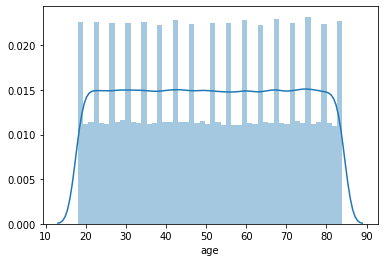

In [7]:
sns.distplot(df_selected["age"])
plt.show()

#### Distribution of age columns is not skewed

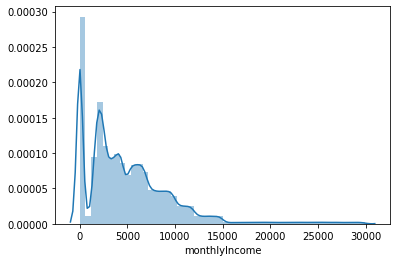

In [8]:
sns.distplot(df_selected["monthlyIncome"])
plt.show()

#### MonthlyIncome column is left-skewed , should be applied log transformation

In [9]:
# add 1 every monhtlyIncome because there are some 0 points and log of zero points are infinitive
df_selected["monthlyIncome"] = np.log(df_selected["monthlyIncome"]+1)

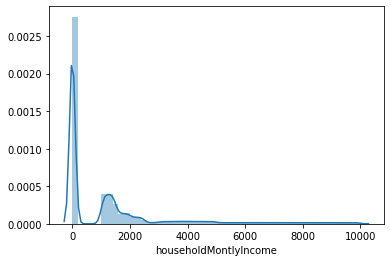

In [10]:
sns.distplot(df_selected["householdMontlyIncome"])
plt.show()

#### householdMontlyIncome column is left-skewed , should be applied log transformation

In [11]:
df_selected["householdMontlyIncome"] = np.log(df_selected["householdMontlyIncome"]+1)

In [12]:
df_selected.describe()

,age,monthlyIncome,numberOfDependents,householdMontlyIncome,married,yearsInCurrentJob,portfolioScore
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,50.981863,6.995214,1.043957,3.449146,0.480833,6.746997,2.002573
std,19.343087,3.276147,0.740770,3.849519,0.499633,5.171618,1.414756
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,7.532624,0.000000,0.000000,0.000000,1.000000,1.000000
50%,51.000000,8.292799,1.000000,0.000000,0.000000,7.000000,2.000000
75%,68.000000,8.857230,2.000000,7.317876,1.000000,11.000000,3.000000
max,84.000000,10.308953,2.000000,9.210340,1.000000,16.000000,4.000000


### StandardScaler 

In [13]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    300000 non-null  int64  
 1   gender                 300000 non-null  object 
 2   monthlyIncome          300000 non-null  float64
 3   educationLevel         300000 non-null  object 
 4   employmentType         300000 non-null  object 
 5   numberOfDependents     300000 non-null  int64  
 6   householdMontlyIncome  300000 non-null  float64
 7   married                300000 non-null  int64  
 8   yearsInCurrentJob      300000 non-null  int64  
 9   portfolioScore         300000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 22.9+ MB


#### Before using StandardScaler, categorical columns (gender, educationLevel, employmentType) should be converted into numerical

In [22]:
number = LabelEncoder()
df_selected["gender"] = number.fit_transform(df_selected["gender"].astype('str'))
# female = 0, male = 1

In [51]:
df_selected["educationLevel"].unique()

array([2, 3, 4, 5, 1])

In [14]:
edu_level_mapping ={'Primary':1,'High School':2,'Bachelor':3, 'Master' :4, 'Doctoral':5}
df_selected['educationLevel'] = df_selected['educationLevel'].map(edu_level_mapping)

In [18]:
df_selected["employmentType"].unique()

array(['Unemployed', 'Full Time', 'Casual', 'Retired', 'Self Employed',
       'Part Time', 'Student'], dtype=object)

In [19]:
emp_level_mapping ={'Student':1,'Unemployed':2,'Part Time':3, 'Casual' :4,
                    'Retired':5, "Self Employed":6, 'Full Time':7}
df_selected['employmentType'] = df_selected['employmentType'].map(emp_level_mapping)

In [24]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    300000 non-null  int64  
 1   gender                 300000 non-null  int64  
 2   monthlyIncome          300000 non-null  float64
 3   educationLevel         300000 non-null  int64  
 4   employmentType         300000 non-null  int64  
 5   numberOfDependents     300000 non-null  int64  
 6   householdMontlyIncome  300000 non-null  float64
 7   married                300000 non-null  int64  
 8   yearsInCurrentJob      300000 non-null  int64  
 9   portfolioScore         300000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 22.9 MB


### Now all the features are numeric, StandardScaler can be applied

In [26]:
scaler = StandardScaler()
scaler.fit(df_selected)
df_normalized = scaler.transform(df_selected)
type(df_normalized)

numpy.ndarray

In [28]:
# StandardScaler return numpy array, it should be converted into dataframe
df_normalized = pd.DataFrame(df_normalized, index=df_selected.index, columns=df_selected.columns)

In [30]:
df_normalized.describe().round(2)

,age,gender,monthlyIncome,educationLevel,employmentType,numberOfDependents,householdMontlyIncome,married,yearsInCurrentJob,portfolioScore
count,300000.00,300000.0,300000.00,300000.00,300000.00,300000.00,300000.0,300000.00,300000.00,300000.00
mean,-0.00,0.0,-0.00,-0.00,-0.00,-0.00,0.0,0.00,0.00,-0.00
std,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
min,-1.71,-1.0,-2.14,-2.29,-1.85,-1.41,-0.9,-0.96,-1.30,-1.42
25%,-0.88,-1.0,0.16,0.12,-0.90,-1.41,-0.9,-0.96,-1.11,-0.71
50%,0.00,1.0,0.40,0.12,0.52,-0.06,-0.9,-0.96,0.05,-0.00
75%,0.88,1.0,0.57,0.12,0.99,1.29,1.0,1.04,0.82,0.71
max,1.71,1.0,1.01,2.53,0.99,1.29,1.5,1.04,1.79,1.41


## Dataframe is ready to use 

# Find the best K value using elbow method
#### Elbow method is a method relies on calculation of sum of the squared errors for different K values. The K value which has the largest outside angle is chosen as the best K value.


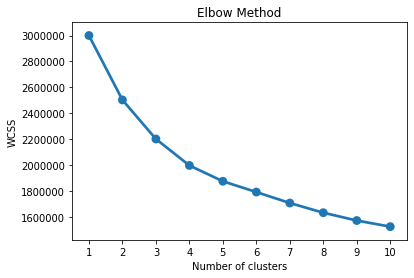

In [33]:
sse = {}

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(df_normalized)
    sse[i] = kmeans.inertia_
    
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

### The best K value is chosen as 4

In [34]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [35]:
cluster_labels = kmeans.labels_

#### Clusters are assigned to every row

In [39]:
df_k4 = df.assign(Cluster = cluster_labels)

In [58]:
df_k4.groupby(['Cluster']).agg({
    'age':'mean',
    'gender': lambda x:x.value_counts().index[0],
    'monthlyIncome':'mean',
    'educationLevel': lambda x:x.value_counts().index[0],
    'employmentType': lambda x:x.value_counts().index[0],
    'numberOfDependents':'mean',
    'householdMontlyIncome':'mean',
    'married': lambda x:x.value_counts().index[0],
    'yearsInCurrentJob':'mean',  
    'portfolioScore':['mean','count']
    
}).round(2)

age   gender monthlyIncome educationLevel employmentType  \
          mean <lambda>          mean       <lambda>       <lambda>   
Cluster                                                               
0        60.08     Male       8051.39       Bachelor      Full Time   
1        30.63     Male       6310.63       Bachelor      Full Time   
2        64.92   Female       4189.14       Bachelor      Full Time   
3        45.18     Male          0.00       Bachelor     Unemployed   

        numberOfDependents householdMontlyIncome  married yearsInCurrentJob  \
                      mean                  mean <lambda>              mean   
Cluster                                                                       
0                     1.42               3539.32        1              9.43   
1                     0.33               1235.33        0              3.06   
2                     1.47                 26.47        1              8.76   
3                     0.88                214.77        0              5.12   

        portfolioScore         
                  mean  count  
Cluster                        
0                 2.00  74968  
1                 2.01  81206  
2                 2.00  91480  
3                 2.00  52346

### The above table shows the mean and the most frequent values for each cluster. It helps us to understand the distribution of the clusters better

In [63]:
df_k4

,customer_id,customer_name,customer_surname,age,gender,email,phone_number,monthlyIncome,educationLevel,employmentType,...,numberOfDependents,householdMontlyIncome,primaryIdentificationNumber,employer,krsScore,married,yearsInCurrentJob,creditHistory,portfolioScore,Cluster
0,0,BILGE MERVE,FATMA,65,Female,BILGEMERVE.FATMA@gmail.com,907972103798,2440,High School,Unemployed,...,2,0,-,-,1806,0,14,1,2,2
1,1,EMINE,MUHSIN,83,Female,EMINE.MUHSIN@gmail.com,906593700101,5389,Bachelor,Full Time,...,2,0,-,-,1221,1,13,2,4,2
2,2,ILYAS,MUSTAFA ARIF,47,Male,ILYAS.MUSTAFAARIF@gmail.com,908437277185,3617,High School,Unemployed,...,2,0,-,-,1336,1,7,0,0,2
3,3,AHMET,ZEYNEP,53,Male,AHMET.ZEYNEP@gmail.com,901436743479,4255,High School,Unemployed,...,1,2417,-,-,1852,1,10,1,2,2
4,4,MEHMET DIRIM,AYSENUR,62,Male,MEHMETDIRIM.AYSENUR@gmail.com,901567389262,6395,Master,Casual,...,1,1568,-,-,1811,0,11,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,YUSUF,KURTULUS,57,Male,YUSUF.KURTULUS@gmail.com,904247809353,11260,Bachelor,Full Time,...,2,5902,-,-,1713,1,12,1,2,0
299996,299996,HAKAN,EMEL,70,Male,HAKAN.EMEL@gmail.com,900198076878,2958,Bachelor,Casual,...,2,0,-,-,1330,1,9,3,0,2
299997,299997,KEMAL,GOKHAN,67,Female,KEMAL.GOKHAN@gmail.com,903189714530,7236,Bachelor,Full Time,...,1,4657,-,-,1307,0,9,2,3,0
299998,299998,VEYSEL,HUSEYIN YAVUZ,82,Male,VEYSEL.HUSEYINYAVUZ@gmail.com,905173854737,5297,Master,Unemployed,...,1,0,-,-,1605,0,6,3,4,2


### It can be seen that which customer belongs to the which cluster